In [43]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')

In [189]:
np.random.seed(0)

In [132]:
SAMPLES = 2000

In [324]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=100):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                fx =  (np.dot(x_i, self.w) - self.b) >= 1
                condition = y_[idx]*fx
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        approx = [0 if i>1 else 1 for i in approx]
        return np.sign(approx)

In [325]:
X, y = datasets.make_blobs(n_samples=SAMPLES,cluster_std=0.3, centers=((0,0),(2,2)), n_features=2, random_state=0)

<AxesSubplot:>

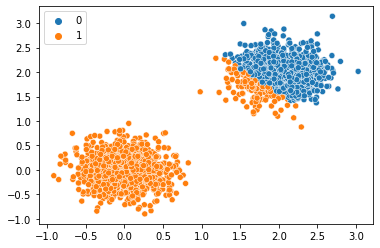

In [329]:
sns.scatterplot(X[:,1],X[:,0],hue=y_pred)

<AxesSubplot:>

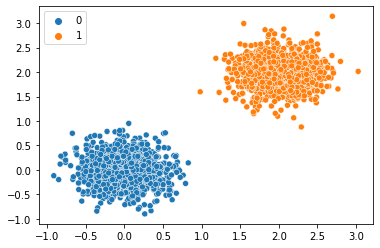

In [208]:
X_blobs, y_blobs = datasets.make_blobs(n_samples=SAMPLES,cluster_std=0.3, centers=((0,0),(2,2)), n_features=2, random_state=0)
sns.scatterplot(X_blobs[:,1],X_blobs[:,0],hue=y_blobs)

<AxesSubplot:>

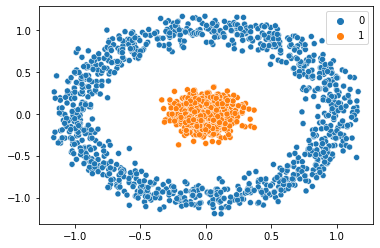

In [209]:
X_circle,y_circle= datasets.make_circles(n_samples=SAMPLES, factor=0.1,noise=0.09)
sns.scatterplot(X_circle[:,0],X_circle[:,1],hue=y_circle)

<AxesSubplot:>

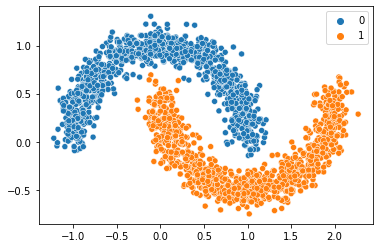

In [210]:
X_moons,y_moons = datasets.make_moons(n_samples=SAMPLES, noise=.1)
sns.scatterplot(X_moons[:,0],X_moons[:,1],hue=y_moons)

In [227]:
def _model(model,X_train,X_test,y_train):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [262]:
def Plot(X_test,y_pred):
    plt.subplots(3,1,figsize=(10, 15))
    for i in range(1,4):
        plt.subplot(3,1,i)
        sns.scatterplot(X_test[i-1][:,0],X_test[i-1][:,1],hue=y_pred[i-1])

In [251]:
def model(model,X_train,X_test,y_train):
    y_pred = []
    for i in range(3):
        y_pred.append(_model(model,X_train[i],X_test[i],y_train[i]))
    Plot(X_test,y_pred)

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
X_train_blobs,X_test_blobs,y_train_blobs,y_test_blobs = train_test_split(X_blobs,y_blobs,test_size=0.3,random_state=33)
X_train_circles,X_test_circles,y_train_circles,y_test_circles = train_test_split(X_circle,y_circle,test_size=0.3,random_state=33)
X_train_moons,X_test_moons,y_train_moons,y_test_moons = train_test_split(X_moons,y_moons,test_size=0.3,random_state=33)
X_train = [X_train_blobs,X_train_circles,X_train_moons]
y_train = [y_train_blobs,y_train_circles,y_train_moons]
X_test = [X_test_blobs,X_test_circles,X_test_moons]
y_test = [y_test_blobs,y_test_circles,y_test_moons]

In [232]:
svm = SVM(0.00001)
svc = SVC(kernel='rbf',C=5)
lg = LogisticRegression()
KNN =  KNeighborsClassifier(n_neighbors=5)

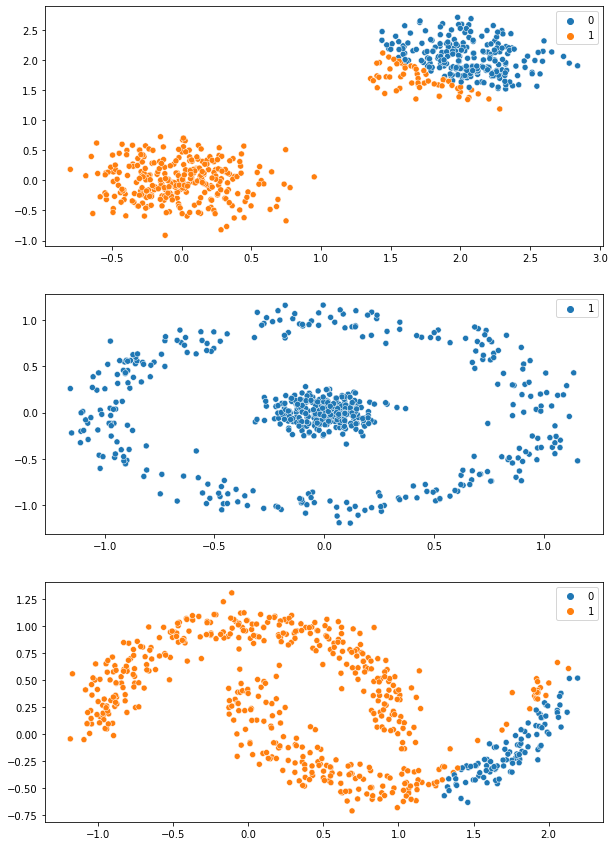

In [332]:
model(svm,X_train,X_test,y_train)

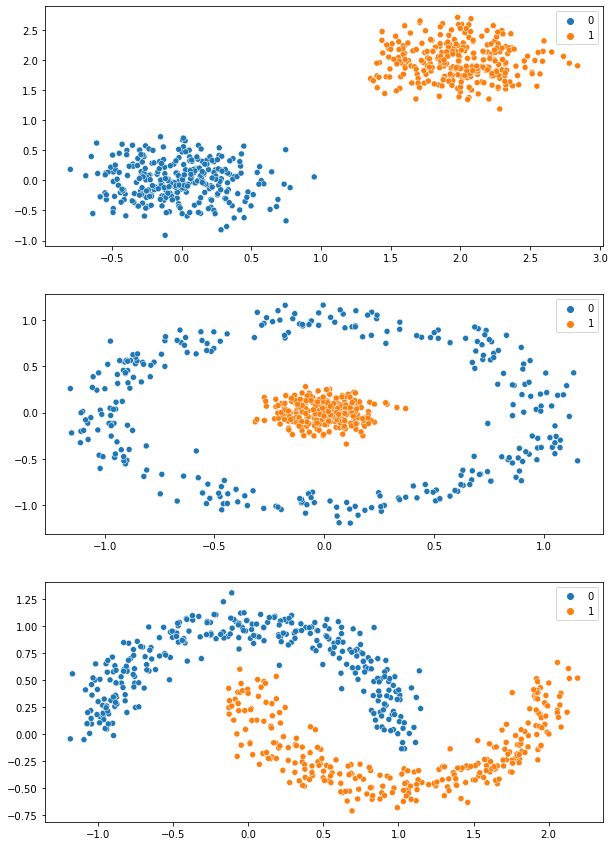

In [263]:
model(svc,X_train,X_test,y_train)

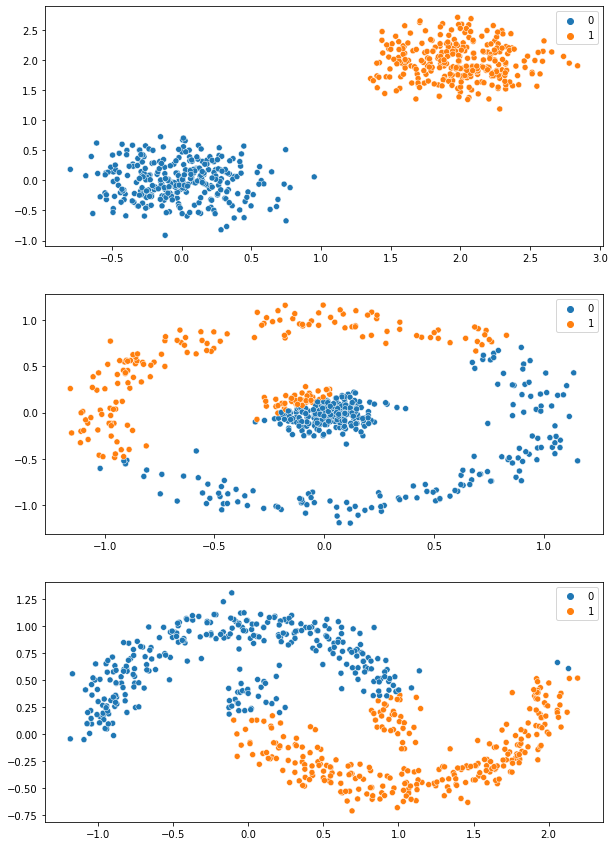

In [264]:
model(lg,X_train,X_test,y_train)

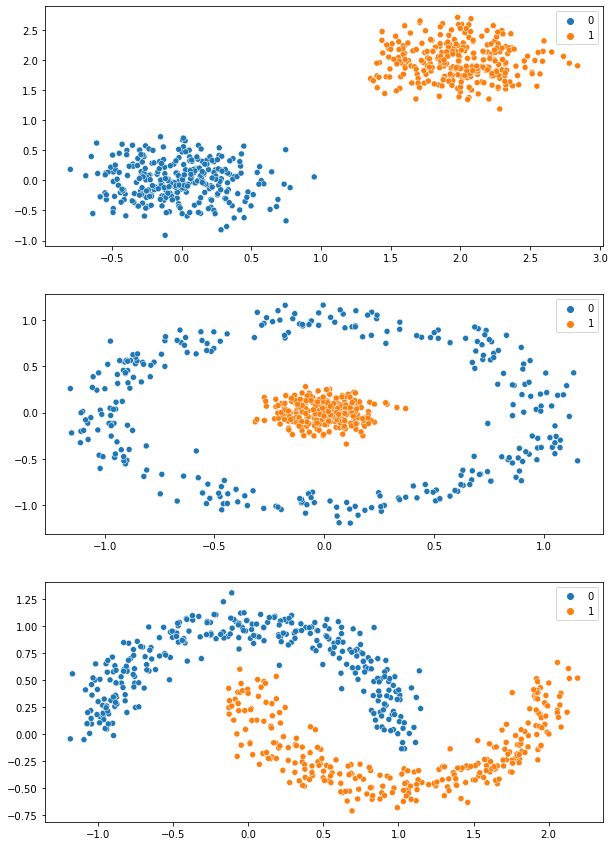

In [265]:
model(KNN,X_train,X_test,y_train)